## Random Forest

Random Forest is an ensemble of Decision Trees. With a few exceptions, a `RandomForestClassifier` has all the hyperparameters of a `DecisionTreeClassifier` (to control how trees are grown), plus all the hyperparameters of a `BaggingClassifier` to control the ensemble itself.

The Random Forest algorithm introduces extra randomness when growing trees; instead of searching for the very best feature when splitting a node, it searches for the best feature among a random subset of features. This results in a greater tree diversity, which (once again) trades a higher bias for a lower variance, generally yielding an overall better model. The following `BaggingClassifier` is roughly equivalent to the previous `RandomForestClassifier`. Run the cell below to visualize a single estimator from a random forest model, using the Iris dataset to classify the data into the appropriate species.

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
iris = load_iris()

In [2]:
type(iris)

sklearn.utils.Bunch

In [3]:
type(iris.data)

numpy.ndarray

In [4]:
iris.data.shape

(150, 4)

In [5]:
type(iris.target)

numpy.ndarray

In [6]:
iris.target.shape

(150,)

In [7]:
#Let's check the feature names and target variable name 
print(iris.feature_names, iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] ['setosa' 'versicolor' 'virginica']


In [8]:
#we can check the first several rows to peek the data
iris.data[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [9]:
iris.target[0:5]

array([0, 0, 0, 0, 0])

In [10]:
#Is there any missing value in the data?
pd.DataFrame(iris.data).isna().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [11]:
#We can develop models now.
# Model (can also use single decision tree)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10) 
# Train
model.fit(iris.data, iris.target)
# Extract single tree
estimator = model.estimators_[5]

In [12]:
model.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=1099495606),
 DecisionTreeClassifier(max_features='auto', random_state=602241613),
 DecisionTreeClassifier(max_features='auto', random_state=358977179),
 DecisionTreeClassifier(max_features='auto', random_state=2045033423),
 DecisionTreeClassifier(max_features='auto', random_state=1503951993),
 DecisionTreeClassifier(max_features='auto', random_state=810614654),
 DecisionTreeClassifier(max_features='auto', random_state=375939910),
 DecisionTreeClassifier(max_features='auto', random_state=155602493),
 DecisionTreeClassifier(max_features='auto', random_state=1650747341),
 DecisionTreeClassifier(max_features='auto', random_state=87901428)]

In [13]:
import graphviz 
from sklearn import tree, metrics

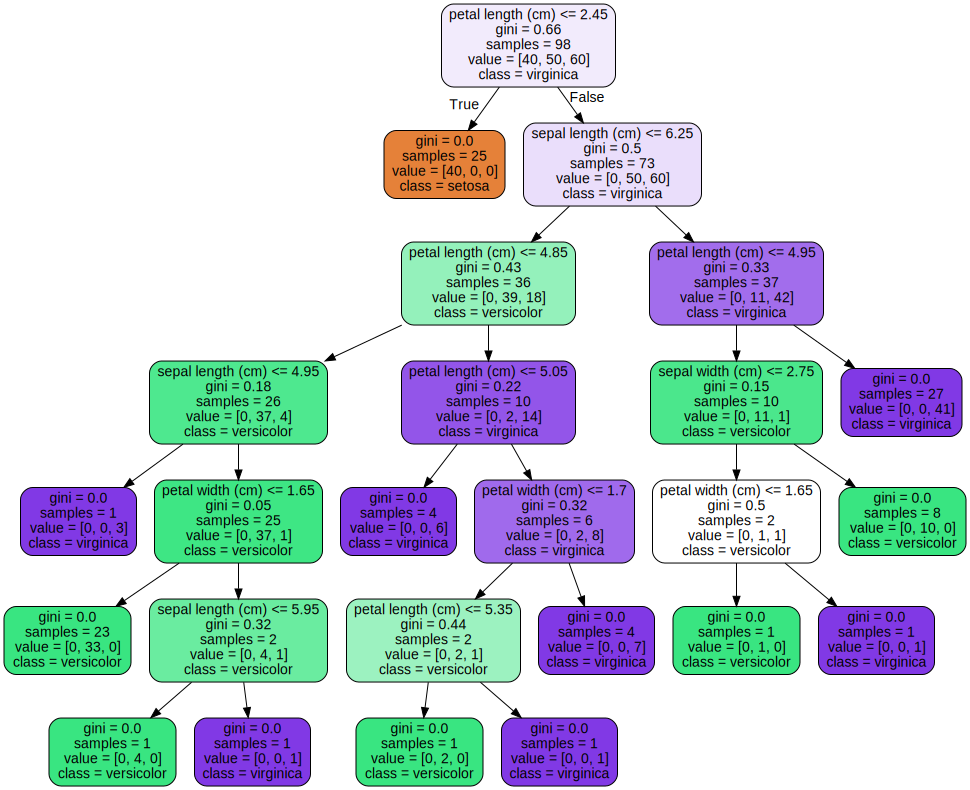

In [14]:
#Here is what it looks like for a single decision tree, estimator.
dot_data = tree.export_graphviz(estimator, out_file = None, feature_names = iris.feature_names, class_names = iris.target_names, rounded = True, proportion = False, precision = 2, filled = True)  
graph = graphviz.Source(dot_data)  
graph

Notice how each split seperates the data into buckets of similar observations. This is a single tree and a relatively simple classification dataset, but the same method is used in a more complex dataset with greater depth to the trees.

* A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.
* The important parameters in random forest model includes:
  * n_estimators (The number of trees in the forest. The default value of n_estimators changed from 10 to 100 in 0.22). In general, a higher number of trees increases the performance and makes the predictions more stable, but it also slows down the computation.
  
  * criterion (Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.)
  * max_depth (The maximum depth of the tree)
  * max_samples (If bootstrap is True, the number of samples to draw from X to train each base estimator)

## Coronavirus
Coronavirus disease (COVID-19) is an infectious disease caused by a new virus.
The disease causes respiratory illness (like the flu) with symptoms such as a cough, fever, and in more severe cases, difficulty breathing. You can protect yourself by washing your hands frequently, avoiding touching your face, and avoiding close contact (1 meter or 3 feet) with people who are unwell. An outbreak of COVID-19 started in December 2019 and at the time of the creation of this project was continuing to spread throughout the world. Many governments recommended only essential outings to public places and closed most business that do not serve food or sell essential items. An excellent [spatial dashboard](https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6) built by Johns Hopkins shows the daily confirmed cases by country. 

This case study was designed to drive home the important role that data science plays in real-world situations like this pandemic. This case study uses the Random Forest Classifier and a dataset from the South Korean cases of COVID-19 provided on [Kaggle](https://www.kaggle.com/kimjihoo/coronavirusdataset) to encourage research on this important topic. The goal of the case study is to build a Random Forest Classifier to predict the 'state' of the patient.

First, please load the needed packages and modules into Python. Next, load the data into a pandas dataframe for ease of use.

In [15]:
import os
from datetime import datetime,timedelta
import seaborn as sns
from plotly import graph_objs as go
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
%matplotlib inline

In [16]:
url ='PatientInfo.csv'
df = pd.read_csv(url)
df.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


Let's get a glimpse of this data set before digging in details.

In [17]:
df.shape

(2218, 18)

1. patient_id : Assigns an identification number to every patient who was tested COVID19 positive
2. sex : Gives the information about the patient’s gender
3. Age : Range of age of the person. (Eg: if a person’s age is 25, he would lie in 20s)
4. Country : Country to which the patient belongs
5. Province : Province to which the patient belongs
6. City : City to which the patient belongs
7. infection_case : Cause of the infection
8. infected_by: the id of the patient that affected this person
9. contact_no : the no. of people this patient came in contact with
10. symptom_onset_date : the date showing the onset of symptoms
11. confirmed_date : the date on which the person tested positive
12. released_date : the date on which the patient was released from the isolation center
13. deceased_date : the date on which the patient died
14. state : the current state of the person (isolated,released,deceased)
15. global_num:
16. birth_year:The year when the patient was born
17. disease:
18. infection order:

In [18]:
#Counts of null values 
na_df=pd.DataFrame(df.isnull().sum().sort_values(ascending=False)).reset_index()
na_df.columns = ['VarName', 'NullCount']
na_df['relativeNull']=na_df.NullCount/df.shape[0]
na_df.relativeNull=round(na_df.relativeNull, 2)
na_df[(na_df['NullCount']>0)]

,VarName,NullCount,relativeNull
0,disease,2199,0.99
1,deceased_date,2186,0.99
2,infection_order,2176,0.98
3,symptom_onset_date,2025,0.91
4,released_date,1995,0.90
5,contact_number,1807,0.81
6,infected_by,1749,0.79
7,infection_case,1055,0.48
8,global_num,904,0.41
9,birth_year,454,0.20


There are five features with missing value percentage >= 90%, disease, decreased_date, infection_order, symptom_onset_date, and relseased_date.

In [19]:
#counts of response variable values
df.state.value_counts()

isolated    1791
released     307
deceased      32
Name: state, dtype: int64

In [20]:
df.columns

Index(['patient_id', 'global_num', 'sex', 'birth_year', 'age', 'country',
       'province', 'city', 'disease', 'infection_case', 'infection_order',
       'infected_by', 'contact_number', 'symptom_onset_date', 'confirmed_date',
       'released_date', 'deceased_date', 'state'],
      dtype='object')

Create a new column named 'n_age' which is the calculated age based on the birth year column. In epidemiology study, age is usually an important related feature.

In [21]:
df['n_age']=2020 - df['birth_year']

In [22]:
#Because we already have n_age, we don't need 'birth_year' and 'age' in the data set any more. We can remove the redundant variables.
df=df.drop(['birth_year','age'], 1)

In [23]:
df.columns

Index(['patient_id', 'global_num', 'sex', 'country', 'province', 'city',
       'disease', 'infection_case', 'infection_order', 'infected_by',
       'contact_number', 'symptom_onset_date', 'confirmed_date',
       'released_date', 'deceased_date', 'state', 'n_age'],
      dtype='object')

In [24]:
df.shape

(2218, 17)

This is a very complicated real-life data set including missing data, numerical and categorical features. But missing data is the most significant issue. Let's handle it first.

## Part I: data wrangling

### 1. Handle Missing Values

 **<font color='teal'> 1.1 Print the number of missing values by column.</font>**

In [25]:
df.isnull().sum()

patient_id               0
global_num             904
sex                    145
country                  0
province                 0
city                    65
disease               2199
infection_case        1055
infection_order       2176
infected_by           1749
contact_number        1807
symptom_onset_date    2025
confirmed_date         141
released_date         1995
deceased_date         2186
state                   88
n_age                  454
dtype: int64

Some features are float, some are integer, and some are object.

 **<font color='teal'> 1.2 Fill the 'disease' missing values with 0 and remap the True values to 1. We turn it into a dummy variable in this way and use it as response variable in model development.</font>**

In [26]:
df.disease.value_counts()#There are only 19 non-null data, True, in column disease

True    19
Name: disease, dtype: int64

In [27]:
df['disease'].fillna(0, inplace = True)

In [28]:
df['disease'].unique()

array([0, True], dtype=object)

In [29]:
df['disease'].replace(to_replace = True, value = 1, inplace = True)  

In [30]:
df['disease'].unique()

array([0, 1], dtype=int64)

In [31]:
df.disease.value_counts()

0    2199
1      19
Name: disease, dtype: int64

 **<font color='teal'> 1.3 Fill null values in the following columns with their mean: 'global_number','infection_order','infected_by'and 'contact_number'. They are numerical features</font>**

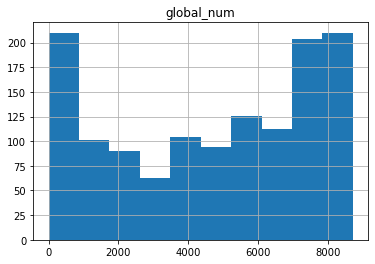

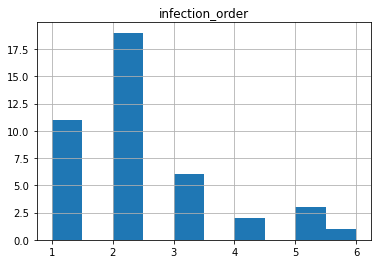

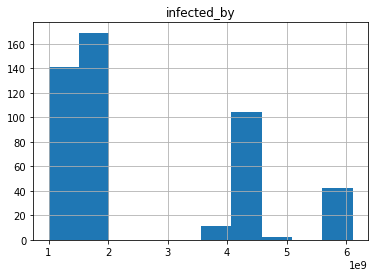

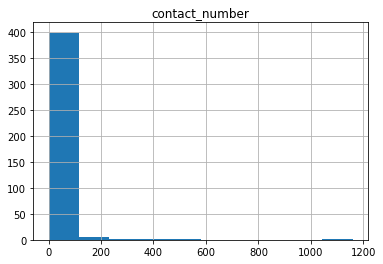

In [32]:
selected_features = [ 'global_num','infection_order','infected_by', 'contact_number']
for i in selected_features:
    plt.figure()
    df[i].dropna().hist()
    plt.title(i)
    

We can also use median to fill the missing data in these features too.

In [33]:
for i in selected_features: 
    df[i].fillna(df[i].mean(),inplace=True)

In [34]:
df[selected_features].isnull().sum()

global_num         0
infection_order    0
infected_by        0
contact_number     0
dtype: int64

 **<font color='teal'>1.3 Remove date columns, and rows with missing 'sex' and 'state' from the data. </font>**


Because there are more than 90% missing data in 'symptom_onset_date','released_date', and 'deceased_date', we will remove them from the data. Although most 'confirmed_date' are available, it cannot give us much information alone as the single date time feature. Therefore, we decide to delete it as well.

In [35]:
df = df.drop(['symptom_onset_date','confirmed_date','released_date','deceased_date'],axis =1)

In [36]:
#delete rows with missing data in 'sex' and 'state'
df = df.dropna(subset=['sex','state'])

In [37]:
df.shape

(1985, 13)

 **<font color='teal'>1.4 Check if there is still any remaining null value. Fill the missing data</font>**

In [38]:
df.isnull().sum()

patient_id           0
global_num           0
sex                  0
country              0
province             0
city                62
disease              0
infection_case     910
infection_order      0
infected_by          0
contact_number       0
state                0
n_age              309
dtype: int64

In [39]:
df['city'].value_counts()

Gyeongsan-si    535
Cheonan-si       98
Gumi-si          59
Chilgok-gun      49
Pohang-si        47
               ... 
Wuhan             1
Guri-si           1
Yeosu-si          1
Dalseong-gun      1
Suncheon-si       1
Name: city, Length: 128, dtype: int64

In [40]:
df['city'].nunique()

128

In [41]:
#define a new variable, GS_city. If the patient comes from Gyeongsan-si, GS-city is 1. Otherwise, it is 0.
df['city'].fillna('unknown', inplace=True)
df['GS_city']=np.where(df['city']=='Gyeongsan-si', '1', '0')

In [42]:
df['GS_city'].value_counts()

0    1450
1     535
Name: GS_city, dtype: int64

In [43]:
df=df.drop('city', 1)

<AxesSubplot:>

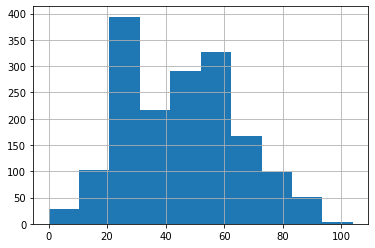

In [44]:
df['n_age'].hist()

In [45]:
df['n_age'].fillna(df['n_age'].mean(),inplace=True)

In [46]:
df.isna().sum()

patient_id           0
global_num           0
sex                  0
country              0
province             0
disease              0
infection_case     910
infection_order      0
infected_by          0
contact_number       0
state                0
n_age                0
GS_city              0
dtype: int64

In [47]:
df['infection_case'].value_counts()
#There is almost half observations with missing infection_case value. Contact with patient, call center and church are the dominant ways to get affected by COVID-19
#We need delete this variable because it is hard to turn it into the dummy variable

contact with patient                459
etc                                 214
Guro-gu Call Center                 102
Shincheonji Church                   86
overseas inflow                      51
Onchun Church                        33
gym facility in Cheonan              29
Ministry of Oceans and Fisheries     27
Cheongdo Daenam Hospital             21
Dongan Church                        17
Eunpyeong St. Mary's Hospital        14
Seongdong-gu APT                     13
gym facility in Sejong                4
Suyeong-gu Kindergarten               3
Pilgrimage to Israel                  1
River of Grace Community Church       1
Name: infection_case, dtype: int64

In [48]:
#define a new column, 'pc_infection_case'. If the infection_case is contact with patient or Shincheonji church, pc_infection_case is 1, otherwise, it is 0.
df['infection_case'].fillna('unknown', inplace=True)
df['pc_infection_case']=np.where(df['infection_case'].isin(['contact with patient','Guro-gu Call Center']), '1', '0')

In [49]:
df=df.drop('infection_case',1)

Review the range of values per column for continous variables.

In [50]:
df.select_dtypes(include=['float64']).describe().T

,count,mean,std,min,25%,50%,75%,max
global_num,1985.0,4.516377e+03,2.214067e+03,1.000000e+00,3.684000e+03,4.664817e+03,5.702000e+03,8.717000e+03
infection_order,1985.0,2.285714e+00,1.804053e-01,1.000000e+00,2.285714e+00,2.285714e+00,2.285714e+00,6.000000e+00
infected_by,1985.0,2.622075e+09,7.530266e+08,1.000000e+09,2.600789e+09,2.600789e+09,2.600789e+09,6.113000e+09
contact_number,1985.0,2.415031e+01,4.140337e+01,0.000000e+00,2.412895e+01,2.412895e+01,2.412895e+01,1.160000e+03
n_age,1985.0,4.507697e+01,1.790658e+01,0.000000e+00,3.000000e+01,4.507697e+01,5.600000e+01,1.040000e+02


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1985 entries, 0 to 2217
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patient_id         1985 non-null   int64  
 1   global_num         1985 non-null   float64
 2   sex                1985 non-null   object 
 3   country            1985 non-null   object 
 4   province           1985 non-null   object 
 5   disease            1985 non-null   int64  
 6   infection_order    1985 non-null   float64
 7   infected_by        1985 non-null   float64
 8   contact_number     1985 non-null   float64
 9   state              1985 non-null   object 
 10  n_age              1985 non-null   float64
 11  GS_city            1985 non-null   object 
 12  pc_infection_case  1985 non-null   object 
dtypes: float64(5), int64(2), object(6)
memory usage: 217.1+ KB


In [52]:
df.isna().sum()

patient_id           0
global_num           0
sex                  0
country              0
province             0
disease              0
infection_order      0
infected_by          0
contact_number       0
state                0
n_age                0
GS_city              0
pc_infection_case    0
dtype: int64

### 2. Check for duplicated rows

In [53]:
duplicateRowsDF = df[df.duplicated()]
duplicateRowsDF

,patient_id,global_num,sex,country,province,disease,infection_order,infected_by,contact_number,state,n_age,GS_city,pc_infection_case


Fortunately, there is no duplciated row in the data set.

### 3. Check the categorical columns and the numerical columns
**<font color='teal'>3.1 Check the categorical columns and their associated levels </font>**

In [54]:
dfo = df.select_dtypes(include=['object'])
dfo.shape

(1985, 6)

In [55]:
#get levels for all categorical variables
vn = pd.DataFrame(dfo.nunique()).reset_index()
vn.columns = ['VarName', 'LevelsCount']
vn.sort_values(by='LevelsCount', ascending =False)
vn

,VarName,LevelsCount
0,sex,2
1,country,4
2,province,17
3,state,3
4,GS_city,2
5,pc_infection_case,2


In [56]:
df['province'].value_counts()

Gyeongsangbuk-do     913
Seoul                282
Gyeonggi-do          213
Chungcheongnam-do    118
Busan                101
Gyeongsangnam-do      81
Daegu                 63
Sejong                41
Incheon               32
Ulsan                 30
Gangwon-do            28
Chungcheongbuk-do     28
Daejeon               22
Gwangju               18
Jeollabuk-do           7
Jeollanam-do           4
Jeju-do                4
Name: province, dtype: int64

In [57]:
#define a new variable, G-province. If the patient comes from Gyeongsangbuk-do, G-province is 1. Otherwise, it is 0.
df['G_province']=np.where(df['province']=='Gyeongsangbuk-do', '1', '0')

In [58]:
df=df.drop('province', 1)

In [59]:
df.head()

,patient_id,global_num,sex,country,disease,infection_order,infected_by,contact_number,state,n_age,GS_city,pc_infection_case,G_province
0,1000000001,2.0,male,Korea,0,1.0,2.600789e+09,75.0,released,56.0,0,0,0
1,1000000002,5.0,male,Korea,0,1.0,2.600789e+09,31.0,released,33.0,0,0,0
2,1000000003,6.0,male,Korea,0,2.0,2.002000e+09,17.0,released,56.0,0,1,0
3,1000000004,7.0,male,Korea,0,1.0,2.600789e+09,9.0,released,29.0,0,0,0
4,1000000005,9.0,female,Korea,0,2.0,1.000000e+09,2.0,released,28.0,0,1,0


**<font color='teal'> 3.2 Study the correlation between the numerical features.</font>**

In [60]:
#get numerical variables
dfn = df.select_dtypes(include=['float64'])
dfn.columns

Index(['global_num', 'infection_order', 'infected_by', 'contact_number',
       'n_age'],
      dtype='object')

<AxesSubplot:>

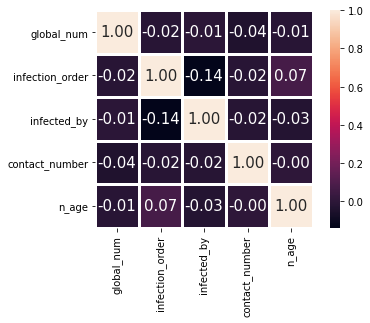

In [61]:
sns.heatmap(dfn.corr(),cbar=True, annot =True, square=True, fmt='.2f',annot_kws={'size':15}, linewidth=3)

There is little correlation between these variables.

**<font color='teal'> 3.3 Check if there are outliers in this data set. </font>**

When reviewing a box plot, an outlier is defined as a data point that is located outside the whiskers of the box plot. Although there are some outliers, it's hard for us to simply delete them, especially when there are many potential ones.

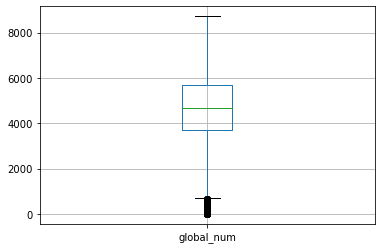

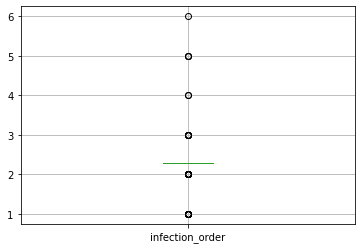

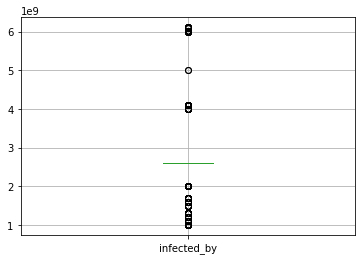

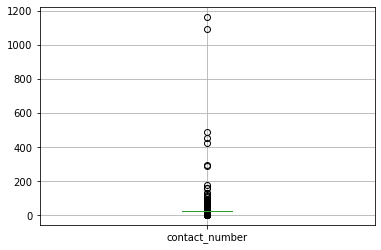

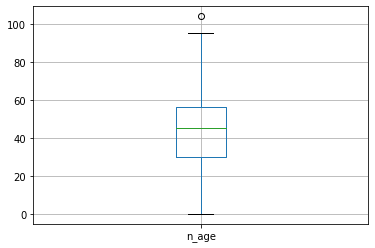

In [62]:
for column in dfn.columns:
    plt.figure()
    dfn.boxplot([column])

'infection_order', 'infected_by', and 'contact_number' are not the continous variables. They are more like ordinal features.
There are too many potential outliers in this data set based on 'global_num', so we decide to keep them in the data set at present

**<font color='teal'> 3.4 Create dummy features for object type features. </font>**

In [63]:
df.state.value_counts()

isolated    1648
released     306
deceased      31
Name: state, dtype: int64

In [64]:
dfo = df.select_dtypes(include=['object'])
dfo.shape

(1985, 6)

In [65]:
dfo.columns

Index(['sex', 'country', 'state', 'GS_city', 'pc_infection_case',
       'G_province'],
      dtype='object')

In [66]:
dfo.nunique()

sex                  2
country              4
state                3
GS_city              2
pc_infection_case    2
G_province           2
dtype: int64

In [67]:
dfo['country'].value_counts()

Korea       1973
China         10
Thailand       1
Mongolia       1
Name: country, dtype: int64

In [68]:
#define a new variable, k_country. If the patients are from Korea, k_country is 1. Otherwise, it is 0.
df['k_country']=np.where(df['country']=='Korea', '1', '0')

In [69]:
df=df.drop('country',1)

In [70]:
#We only need transform variable,'state' into dummy variable
df.state.value_counts()

isolated    1648
released     306
deceased      31
Name: state, dtype: int64

There are several ways to convert categorical variables in sklearn. Here, we will define state_c=1 if state='isolated', state_c=2 if state='released', state_c=3 if state='deceased' 

In [71]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['state_c']=le.fit_transform(df['state'])
le.classes_

array(['deceased', 'isolated', 'released'], dtype=object)

In [72]:
df.head()

,patient_id,global_num,sex,disease,infection_order,infected_by,contact_number,state,n_age,GS_city,pc_infection_case,G_province,k_country,state_c
0,1000000001,2.0,male,0,1.0,2.600789e+09,75.0,released,56.0,0,0,0,1,2
1,1000000002,5.0,male,0,1.0,2.600789e+09,31.0,released,33.0,0,0,0,1,2
2,1000000003,6.0,male,0,2.0,2.002000e+09,17.0,released,56.0,0,1,0,1,2
3,1000000004,7.0,male,0,1.0,2.600789e+09,9.0,released,29.0,0,0,0,1,2
4,1000000005,9.0,female,0,2.0,1.000000e+09,2.0,released,28.0,0,1,0,1,2


In [73]:
df.state_c.value_counts()

1    1648
2     306
0      31
Name: state_c, dtype: int64

In [74]:
df=df.drop('state',1)

Check the data set again. 

In [75]:
df.isna().sum()

patient_id           0
global_num           0
sex                  0
disease              0
infection_order      0
infected_by          0
contact_number       0
n_age                0
GS_city              0
pc_infection_case    0
G_province           0
k_country            0
state_c              0
dtype: int64

In [76]:
df.dtypes

patient_id             int64
global_num           float64
sex                   object
disease                int64
infection_order      float64
infected_by          float64
contact_number       float64
n_age                float64
GS_city               object
pc_infection_case     object
G_province            object
k_country             object
state_c                int32
dtype: object

In [77]:
df['d_sex']=np.where(df['sex']=='female', '1', '0')
df=df.drop('sex',1)

In [78]:
df.shape

(1985, 13)

In [79]:
#convert object type data into numerical data
df[['d_sex','GS_city','pc_infection_case','G_province','k_country']]=df[['d_sex','GS_city','pc_infection_case','G_province','k_country']].astype(int)

In [80]:
df.dtypes

patient_id             int64
global_num           float64
disease                int64
infection_order      float64
infected_by          float64
contact_number       float64
n_age                float64
GS_city                int32
pc_infection_case      int32
G_province             int32
k_country              int32
state_c                int32
d_sex                  int32
dtype: object

## Part II: model development 

### 1. Split the data into test and train subsamples

In [81]:
df.columns

Index(['patient_id', 'global_num', 'disease', 'infection_order', 'infected_by',
       'contact_number', 'n_age', 'GS_city', 'pc_infection_case', 'G_province',
       'k_country', 'state_c', 'd_sex'],
      dtype='object')

In [82]:
# define X and y before model development
X = df.drop(['state_c','patient_id'], axis = 1)
y = df[['state_c']]
print(X.shape, y.shape)

(1985, 11) (1985, 1)


In [83]:
from sklearn.model_selection import train_test_split

# dont forget to define your X and y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

The data is randomly divided into test set and training set. The training set includes 80% of the original data. The rest data will be used for testing in the test set. This is a multilabel classification problem now

### 2. Scale data to prep for model creation

In [84]:
#scale data
from sklearn import preprocessing
import numpy as np
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [85]:
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score,log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score

### 3. Fit Random Forest Classifier
The fit model shows an overall accuracy of 84% which is great and indicates our model was effectively able to identify the status of a patients in the South Korea dataset.

In [86]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)
model_res = clf.fit(X_train_scaled, y_train)
y_pred = model_res.predict(X_test_scaled)
y_pred.shape

<ipython-input-86-893f65b91d90>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_res = clf.fit(X_train_scaled, y_train)


(397,)

In [87]:
from sklearn.metrics import multilabel_confusion_matrix
cm = multilabel_confusion_matrix(y_test, y_pred)
cm

array([[[393,   1],
        [  0,   3]],

       [[ 24,  43],
        [ 21, 309]],

       [[313,  20],
        [ 43,  21]]], dtype=int64)

In [88]:
f1 = f1_score(y_test, y_pred, average=None)
f1

array([0.85714286, 0.90615836, 0.4       ])

In [89]:
#in order to get one f1 score, we need choose the average method
#average='micro' in f1_score will calculates positive and negative values globally
f1 = f1_score(y_test, y_pred, average='micro')
print('Random Forest: f1_score using micro average=%.3f' % (f1))

Random Forest: f1_score using micro average=0.839


In [90]:
#average='macro' in f1_score will take the average of each class
f1 = f1_score(y_test, y_pred, average='macro')
print('Random Forest: f1_score using macro average=%.3f' % (f1))
#The macro method treats all classes as equal, independent of the sample sizes

Random Forest: f1_score using macro average=0.721


In [91]:
f1 = f1_score(y_test, y_pred, average='weighted')
print('Random Forest: f1_score using weighted average=%.3f' % (f1))
#we prefer the weighted f1 score because it was averaged by using the number of instances in a class as weights

Random Forest: f1_score using weighted average=0.824


In [92]:
accu=accuracy_score(y_test, y_pred)
print('Random Forest: accuracy score=%.3f' % (accu))

Random Forest: accuracy score=0.839


### Create Confusion Matrix Plots
Confusion matrices are great ways to review your model performance for a multi-class classification problem. Being able to identify which class the misclassified observations end up in is a great way to determine if you need to build additional features to improve your overall model. In the example below we plot a regular counts confusion matrix as well as a weighted percent confusion matrix. The percent confusion matrix is particulary helpful when you have unbalanced class sizes.

In [93]:
class_names=['deseased','isolated','released'] # name  of classes

Confusion matrix, without normalization
[[  3   0   0]
 [  1 309  20]
 [  0  43  21]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.94 0.06]
 [0.   0.67 0.33]]


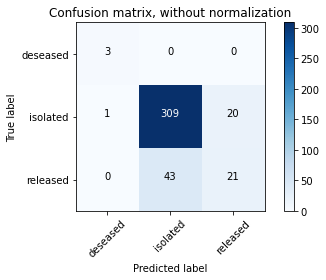

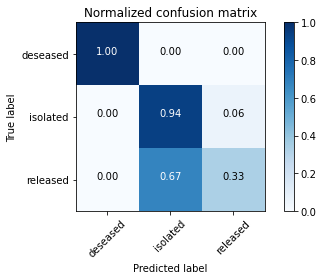

In [94]:
import itertools
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
#plt.savefig('figures/RF_cm_multi_class.png')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
#plt.savefig('figures/RF_cm_proportion_multi_class.png', bbox_inches="tight")
plt.show()

Because y is not balanced, with only 31 released, 306 decreased and the rest are all isolated, we cannot simply use accuracy to evaluate the model. Other model evaluation metrics should be evaluated as well.

### Plot feature importances
The random forest algorithm can be used as a regression or classification model. In either case it tends to be a bit of a black box, where understanding what's happening under the hood can be difficult. Plotting the feature importances is one way that you can gain a perspective on which features are driving the model predictions.

11


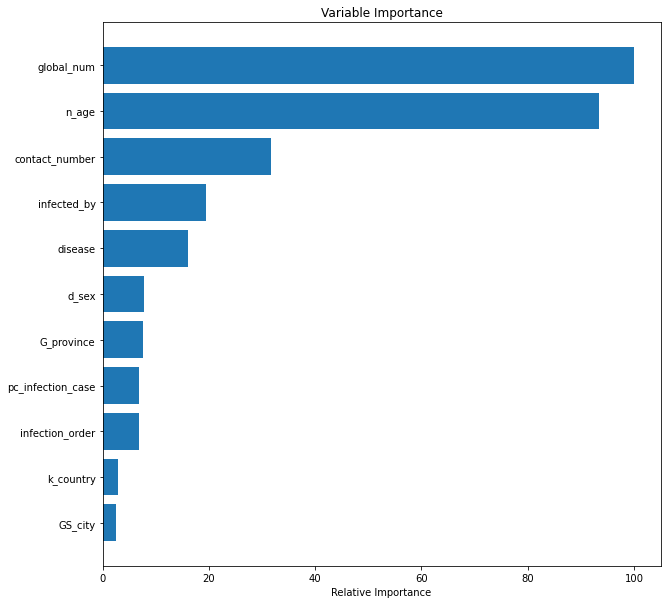

In [95]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

The popularity of random forest is primarily due to how well it performs in a multitude of data situations. It tends to handle highly correlated features well, where as a linear regression model would not. In this case study we demonstrate the performance ability even with only a few features and almost all of them being highly correlated with each other.
Random Forest is also used as an efficient way to investigate the importance of a set of features with a large data set. Consider random forest to be one of your first choices when building a decision tree, especially for multiclass classifications.